# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sosnogorsk
Processing Record 2 of Set 1 | susuman
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 5 of Set 1 | auki
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | lichinga
Processing Record 8 of Set 1 | montagu
Processing Record 9 of Set 1 | malpe
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | mejit
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | tukrah
Processing Record 17 of Set 1 | tolanaro
Processing Record 18 of Set 1 | ivdel'
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | smithers
Processing Record 21 of Set 1 | ta`u
P

Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | genhe
Processing Record 43 of Set 4 | camp verde
Processing Record 44 of Set 4 | berezovo
Processing Record 45 of Set 4 | ocozocoautla de espinosa
Processing Record 46 of Set 4 | daru
Processing Record 47 of Set 4 | las cruces
Processing Record 48 of Set 4 | hastings
Processing Record 49 of Set 4 | laguna
Processing Record 0 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 1 of Set 5 | moree
Processing Record 2 of Set 5 | dapa
Processing Record 3 of Set 5 | nieuw amsterdam
Processing Record 4 of Set 5 | kuchaiburi
Processing Record 5 of Set 5 | holualoa
Processing Record 6 of Set 5 | puerto deseado
Processing Record 7 of Set 5 | siguiri
Processing Record 8 of Set 5 | saltpond
Processing Record 9 of Set 5 | alamos
Processing Record 10 of Set 5 | fray luis beltran
Processing Record 11 of Set 5 | greymouth
Processing Record 12 of Set 5 | colonia
Processing Record 13 of Set 5 | haiku-pauwela
Processi

Processing Record 32 of Set 8 | cambria
Processing Record 33 of Set 8 | okha
Processing Record 34 of Set 8 | sallisaw
Processing Record 35 of Set 8 | camanducaia
Processing Record 36 of Set 8 | newman
Processing Record 37 of Set 8 | thief river falls
Processing Record 38 of Set 8 | dakhla
Processing Record 39 of Set 8 | deltebre
Processing Record 40 of Set 8 | geraldton
Processing Record 41 of Set 8 | hasparren
Processing Record 42 of Set 8 | mossel bay
Processing Record 43 of Set 8 | jaynagar-majilpur
Processing Record 44 of Set 8 | benghazi
Processing Record 45 of Set 8 | onsala
Processing Record 46 of Set 8 | mhamid
Processing Record 47 of Set 8 | rovaniemi
Processing Record 48 of Set 8 | banjar
Processing Record 49 of Set 8 | antsiranana
Processing Record 0 of Set 9 | moyale
Processing Record 1 of Set 9 | aswan
Processing Record 2 of Set 9 | suicheng
Processing Record 3 of Set 9 | fang
Processing Record 4 of Set 9 | markala
Processing Record 5 of Set 9 | san jeronimo de juarez
Proc

Processing Record 20 of Set 12 | kokopo
Processing Record 21 of Set 12 | toga village
City not found. Skipping...
Processing Record 22 of Set 12 | shetpe
Processing Record 23 of Set 12 | shyshaky
Processing Record 24 of Set 12 | hebi
Processing Record 25 of Set 12 | nouadhibou
Processing Record 26 of Set 12 | uzgen
Processing Record 27 of Set 12 | tafuna
Processing Record 28 of Set 12 | carutapera
Processing Record 29 of Set 12 | viana
Processing Record 30 of Set 12 | gereida
Processing Record 31 of Set 12 | sogndal
Processing Record 32 of Set 12 | malvan
Processing Record 33 of Set 12 | ocean acres
Processing Record 34 of Set 12 | darwin
Processing Record 35 of Set 12 | sandnessjoen
Processing Record 36 of Set 12 | hayma'
City not found. Skipping...
Processing Record 37 of Set 12 | maitum
Processing Record 38 of Set 12 | tabas
Processing Record 39 of Set 12 | nizao
Processing Record 40 of Set 12 | ciudad rodrigo
Processing Record 41 of Set 12 | amancio
City not found. Skipping...
Proc

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sosnogorsk,63.6023,53.8817,-9.14,99,96,1.34,RU,1698721554
1,susuman,62.7833,148.1667,-13.34,94,82,0.45,RU,1698721554
2,adamstown,-25.0660,-130.1015,23.00,76,100,3.06,PN,1698721376
3,auki,-8.7676,160.7034,27.86,82,98,0.78,SB,1698721554
4,papatowai,-46.5619,169.4708,14.90,66,100,2.51,NZ,1698721554


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sosnogorsk,63.6023,53.8817,-9.14,99,96,1.34,RU,1698721554
1,susuman,62.7833,148.1667,-13.34,94,82,0.45,RU,1698721554
2,adamstown,-25.0660,-130.1015,23.00,76,100,3.06,PN,1698721376
3,auki,-8.7676,160.7034,27.86,82,98,0.78,SB,1698721554
4,papatowai,-46.5619,169.4708,14.90,66,100,2.51,NZ,1698721554


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

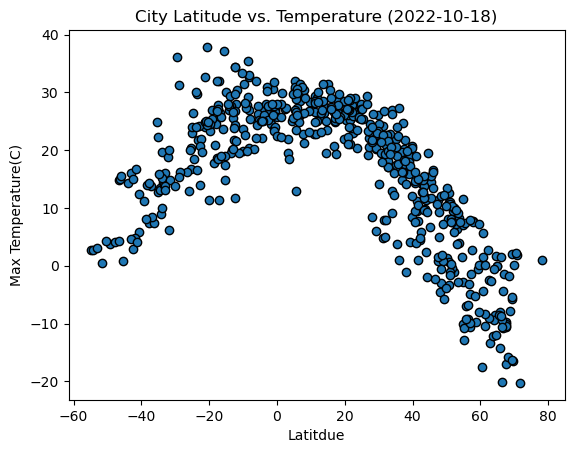

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitdue")
plt.ylabel("Max Temperature(C)")
plt.title("City Latitude vs. Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

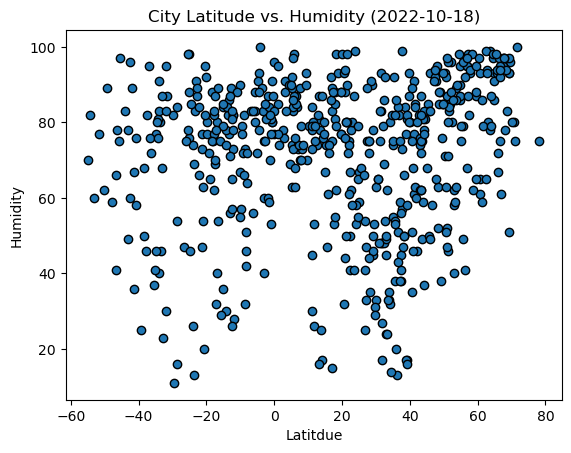

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitdue")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

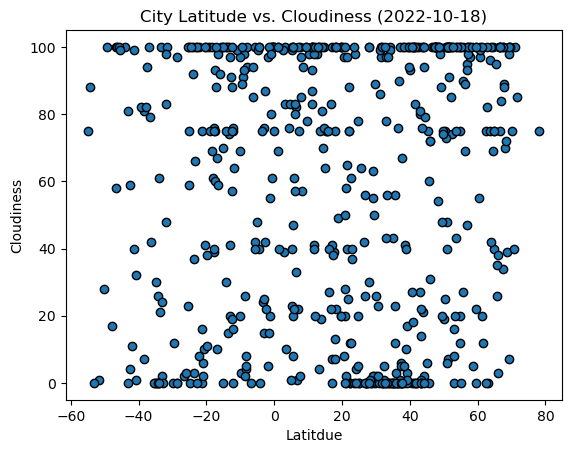

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitdue")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

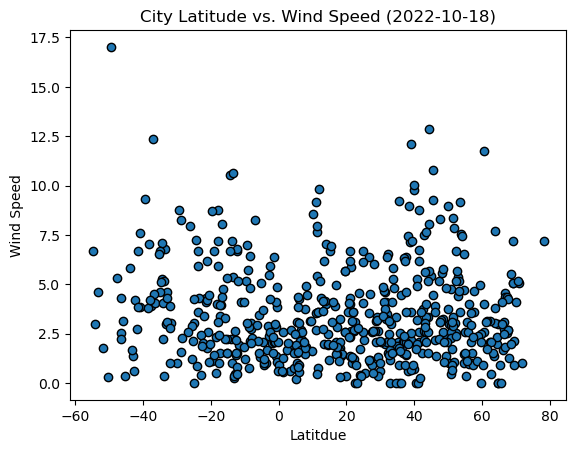

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitdue")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis,y_axis)
    p_fit = p_slope * x_axis + p_int
    r_value= f"y ={p_slope: .2f}x +{ p_int: .2f}"

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sosnogorsk,63.6023,53.8817,-9.14,99,96,1.34,RU,1698721554
1,susuman,62.7833,148.1667,-13.34,94,82,0.45,RU,1698721554
7,malpe,13.3500,74.7167,25.61,81,100,1.95,IN,1698721555
9,san patricio,28.0170,-97.5169,8.43,72,100,6.04,US,1698721476
10,mejit,10.2753,170.8646,28.23,79,98,8.56,MH,1698721556


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,23.00,76,100,3.06,PN,1698721376
3,auki,-8.7676,160.7034,27.86,82,98,0.78,SB,1698721554
4,papatowai,-46.5619,169.4708,14.90,66,100,2.51,NZ,1698721554
5,lichinga,-13.3128,35.2406,20.05,77,100,5.36,MZ,1698721555
6,montagu,-40.7667,144.9667,12.49,58,32,7.59,AU,1698721555


###  Temperature vs. Latitude Linear Regression Plot

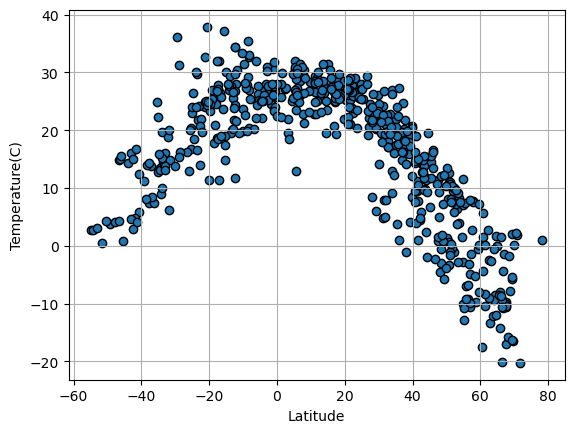

In [95]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')
plt.grid()

plt.show()

In [88]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

**Discussion about the linear relationship:** In the northern hemisphere, a city's latitude and temperature have a strong negative coorelation(-0.81). In the southern hemisphere, a city's latitude and temperature have a positive coorelation(0.73).

### Humidity vs. Latitude Linear Regression Plot

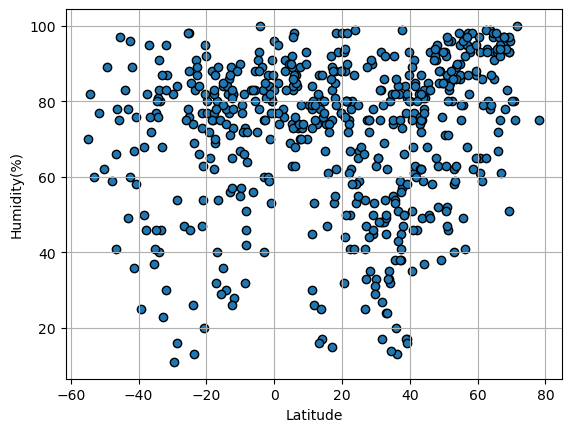

In [94]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')
plt.grid()


# Show plot
plt.show()

Text(0, 0.5, 'Humidity(%)')

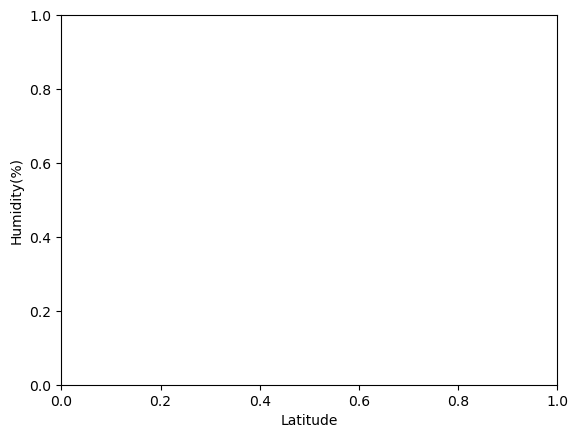

In [96]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** In the northern hemisphere, a city's latitude and humidity have a weak positive coorelation(0.16). In the southern hemisphere, a city's latitude and humidity also have a weak positive coorelation(0.08).

### Cloudiness vs. Latitude Linear Regression Plot

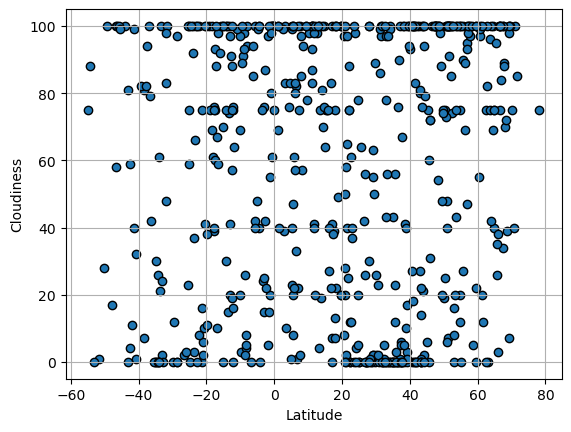

In [99]:
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.grid()

# Show plot
plt.show()

The r-value is: 0.02056735429994368


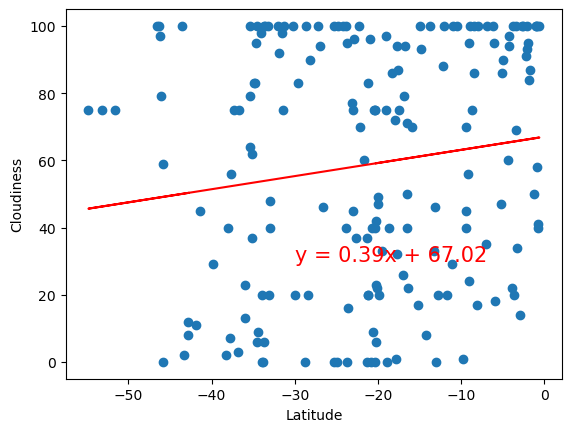

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


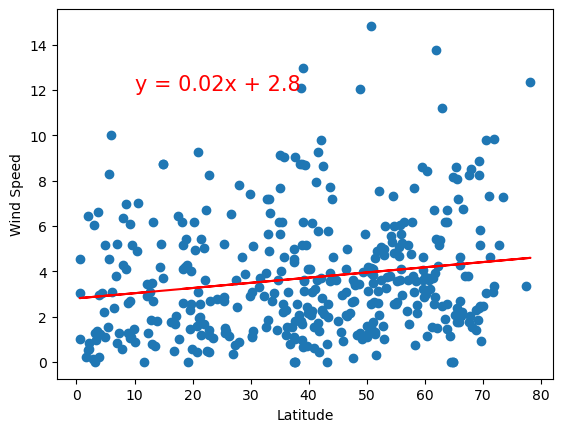

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


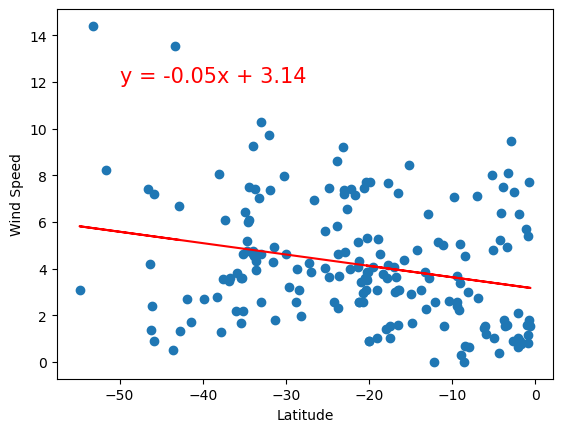

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** In the northern hemisphere, a city's latitude and wind speed have no coorelation(0.03). In the southern hemisphere, it is a similar situation with very minor positive coorelation(0.6) between city's latitude and wind speed.